In [2]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from collections import Counter
from itertools import chain
import contractions
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder
from nltk import ngrams

C:\Users\devra\AppData\Local\Temp\ipykernel_18000\392976305.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
ROOT = r"C:\\Users\\devra\\Downloads\\Codes_PhD"
DATA_DIR = rf"{ROOT}\\dataset\\bvclassifier"
MBTI_RAW_CSV_PATH = os.path.join(DATA_DIR, "mbti_clean_biTri.csv")
# MODEL = rf"{ROOT}\\models\\Para_ml\\"

In [4]:
data = pd.read_csv(MBTI_RAW_CSV_PATH)
data.info()
data.describe()
# _classes=data.type.unique()
# print(_classes)
# total = data.groupby(['type']).count().sort_values(by=['posts'],ascending=False)
# #total

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8674 entries, 0 to 8673
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   E-I           8674 non-null   object
 1   N-S           8674 non-null   object
 2   F-T           8674 non-null   object
 3   J-P           8674 non-null   object
 4   cleaned_post  8674 non-null   object
 5   bigrams       8674 non-null   object
 6   trigrams      8674 non-null   object
dtypes: object(7)
memory usage: 474.5+ KB


,E-I,N-S,F-T,J-P,cleaned_post,bigrams,trigrams
count,8674,8674,8674,8674,8674,8674,8674
unique,2,2,2,2,8674,8674,8674
top,I,N,F,P,moment sportscenter top ten play prank life ch...,"[('moment', 'sportscenter'), ('sportscenter', ...","[('moment', 'sportscenter', 'top'), ('sportsce..."
freq,6675,7477,4693,5240,1,1,1


In [5]:
def show_class_distribution(data, x="type", title="Personality Type Distribution", figsize=(5, 2),xticks_size=10, palette="icefire"):
    plt.figure(figsize=(8, 4))
    sns.countplot(x=x, data=data, palette=palette)
    plt.title(title, fontsize=12)
    plt.xlabel(x, fontsize=xticks_size)
    plt.ylabel("Count", fontsize=xticks_size)
    plt.xticks(fontsize=xticks_size)
    plt.show()


In [7]:
# show_class_distribution(data, x="type", title="Personality Type Distribution",figsize=(10, 2), palette="icefire")

In [11]:
# Function to calculate the number of words in a text
def count_words(text):
    return len(text.split())
data['word_count'] = data['posts'].apply(count_words)
word_count_by_type = data.groupby('type')['word_count'].sum().reset_index()

print(word_count_by_type)

word_count_by_type.to_csv(os.path.join(DATA_DIR,"words_count_raw.csv"))

    type  word_count
0   ENFJ      244451
1   ENFP      851020
2   ENTJ      281378
3   ENTP      826107
4   ESFJ       54200
5   ESFP       49062
6   ESTJ       47952
7   ESTP      103471
8   INFJ     1879295
9   INFP     2280021
10  INTJ     1303284
11  INTP     1561883
12  ISFJ      206055
13  ISFP      307960
14  ISTJ      248711
15  ISTP      392795


In [20]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder

ROOT = r"C:\\Users\\devra\\Downloads\\Codes_PhD"
DATA_DIR = rf"{ROOT}\\dataset\\bvclassifier"
MBTI_RAW_CSV_PATH = os.path.join(DATA_DIR, "mbti_biTri.csv")
df = pd.read_csv(MBTI_RAW_CSV_PATH)

# Convert personality types to numerical labels using LabelEncoder
label_encoder = LabelEncoder()
df['type_label'] = label_encoder.fit_transform(df['type'])

# Extract personality types and posts
personality_types = df['type_label']
posts = df['posts']

# Use CountVectorizer to convert text data into a bag-of-words representation
vectorizer = CountVectorizer()
posts_matrix = vectorizer.fit_transform(posts)

# Calculate cosine similarity between posts
cosine_sim = cosine_similarity(posts_matrix)

# Calculate Pearson correlation coefficient between personality types based on cosine similarity
corr_coef, _ = pearsonr(personality_types, cosine_sim.diagonal())

print(f"Pearson correlation coefficient: {corr_coef}")

Pearson correlation coefficient: -0.029466615391617972


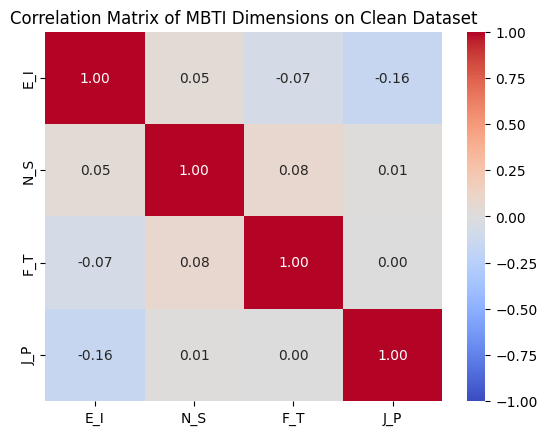

In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
ROOT = r"C:\\Users\\devra\\Downloads\\Codes_PhD"
DATA_DIR = rf"{ROOT}\\dataset\\bvclassifier"
MBTI_RAW_CSV_PATH = os.path.join(DATA_DIR, "mbti_biTri.csv")
df = pd.read_csv(MBTI_RAW_CSV_PATH)

# Extract four MBTI dimensions: E-I, N-S, F-T, J-P
df['E_I'] = df['type'].apply(lambda x: 'E' if x[0] == 'E' else 'I')
df['N_S'] = df['type'].apply(lambda x: 'N' if x[1] == 'N' else 'S')
df['F_T'] = df['type'].apply(lambda x: 'F' if x[2] == 'F' else 'T')
df['J_P'] = df['type'].apply(lambda x: 'J' if x[3] == 'J' else 'P')

# Convert categorical dimensions to numerical labels
label_encoder = LabelEncoder()
df['E_I'] = label_encoder.fit_transform(df['E_I'])
df['N_S'] = label_encoder.fit_transform(df['N_S'])
df['F_T'] = label_encoder.fit_transform(df['F_T'])
df['J_P'] = label_encoder.fit_transform(df['J_P'])

# Create a DataFrame with the four dimensions
dimensions_df = df[['E_I', 'N_S', 'F_T', 'J_P']]

# Calculate the correlation matrix
corr_matrix = dimensions_df.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of MBTI Dimensions on Clean Dataset')
plt.show()

In [12]:
ROOT = r"C:\\Users\\devra\\Downloads\\Codes_PhD"
DATA_DIR = rf"{ROOT}\\dataset\\bvclassifier"
MBTI_RAW_CSV_PATH = os.path.join(DATA_DIR, "mbti_biTri.csv")
data2 = pd.read_csv(MBTI_RAW_CSV_PATH)
def count_words(text):
    return len(text.split())

data2['word_count'] = data2['posts'].apply(count_words)

word_count_by_type = data2.groupby('type')['word_count'].sum().reset_index()

# Display the result
print(word_count_by_type)
word_count_by_type.to_csv(os.path.join(DATA_DIR,"words_count_clean.csv"))

    type  word_count
0   ENFJ      115573
1   ENFP      406857
2   ENTJ      135717
3   ENTP      402646
4   ESFJ       25813
5   ESFP       23729
6   ESTJ       22791
7   ESTP       49834
8   INFJ      900590
9   INFP     1099226
10  INTJ      632145
11  INTP      761614
12  ISFJ       98369
13  ISFP      149113
14  ISTJ      119405
15  ISTP      191372


In [ ]:
from scipy.stats import pearsonr
# Calculate Pearson correlation coefficient between personality type indicators
correlation_matrix_clean = data2.corr(method='pearson')

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix_clean)

In [8]:
# def divide_types(df):
#     df["E-I"] = df["type"].apply(lambda x: "E" if x[0] == "E" else "I")
#     df["N-S"] = df["type"].apply(lambda x: "N" if x[1] == "N" else "S")
#     df["F-T"] = df["type"].apply(lambda x: "F" if x[2] == "F" else "T")
#     df["J-P"] = df["type"].apply(lambda x: "J" if x[3] == "J" else "P")
#     return df

# data = divide_types(data)

C:\Users\devra\AppData\Local\Temp\ipykernel_18000\307745926.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette, ax=ax)
C:\Users\devra\AppData\Local\Temp\ipykernel_18000\307745926.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette, ax=ax)
C:\Users\devra\AppData\Local\Temp\ipykernel_18000\307745926.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette, ax=ax)
C:\Users\devra\AppData\Local\Temp\ipykernel_18000\307745926.py:2: FutureWarning: 

Pa

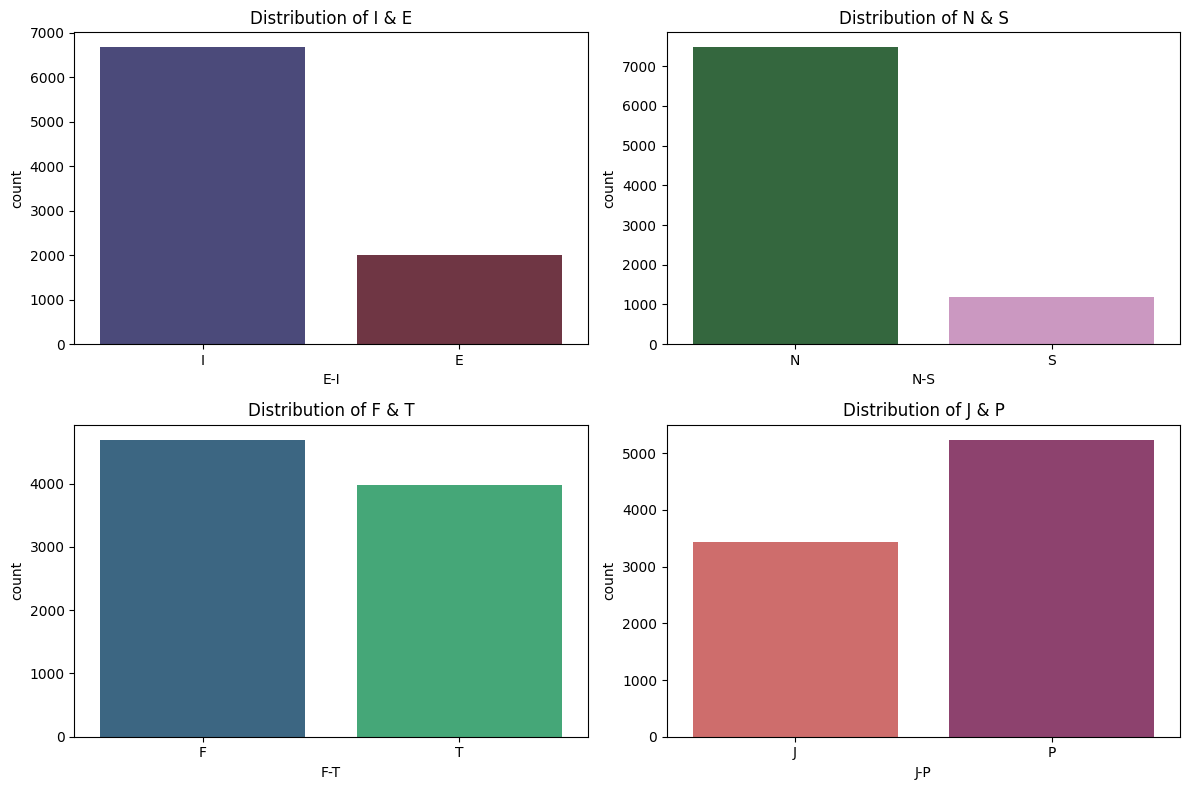

In [9]:
def show_class_distribution(data, x, title, ax, palette):
    sns.countplot(x=x, data=data, palette=palette, ax=ax)
    ax.set_title(title)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

show_class_distribution(data, x="E-I", title="Distribution of I & E", ax=axes[0, 0], palette="icefire")
show_class_distribution(data, x="N-S", title="Distribution of N & S", ax=axes[0, 1], palette="cubehelix")
show_class_distribution(data, x="F-T", title="Distribution of F & T", ax=axes[1, 0], palette="viridis")
show_class_distribution(data, x="J-P", title="Distribution of J & P", ax=axes[1, 1], palette="flare")

plt.tight_layout()
plt.show()

In [10]:
# show_class_distribution(data, x="E-I", title="Distribution of I & E", figsize=(5, 2),palette="icefire")
# show_class_distribution(data, x="N-S", title="Distribution of N & S", figsize=(5, 2),palette="cubehelix")
# show_class_distribution(data, x="F-T", title="Distribution of F & T", figsize=(5, 2),palette="viridis")
# show_class_distribution(data, x="J-P", title="Distribution of J & P", figsize=(5, 2),palette="flare")

In [11]:
data.head(10)

,E-I,N-S,F-T,J-P,cleaned_post,bigrams,trigrams
0,I,N,F,J,moment sportscenter top ten play prank life ch...,"[('moment', 'sportscenter'), ('sportscenter', ...","[('moment', 'sportscenter', 'top'), ('sportsce..."
1,E,N,T,P,finding lack post alarming sex boring position...,"[('finding', 'lack'), ('lack', 'post'), ('post...","[('finding', 'lack', 'post'), ('lack', 'post',..."
2,I,N,T,P,good one course say know blessing curse absolu...,"[('good', 'one'), ('one', 'course'), ('course'...","[('good', 'one', 'course'), ('one', 'course', ..."
3,I,N,T,J,dear enjoyed conversation day esoteric gabbing...,"[('dear', 'enjoyed'), ('enjoyed', 'conversatio...","[('dear', 'enjoyed', 'conversation'), ('enjoye..."
4,E,N,T,J,fired another silly misconception approaching ...,"[('fired', 'another'), ('another', 'silly'), (...","[('fired', 'another', 'silly'), ('another', 's..."
5,I,N,T,J,science perfect scientist claim scientific inf...,"[('science', 'perfect'), ('perfect', 'scientis...","[('science', 'perfect', 'scientist'), ('perfec..."
6,I,N,F,J,draw nail haha done professional nail yes gel ...,"[('cannot', 'draw'), ('draw', 'nail'), ('nail'...","[('cannot', 'draw', 'nail'), ('draw', 'nail', ..."
7,I,N,T,J,tend build collection thing desktop use freque...,"[('tend', 'build'), ('build', 'collection'), (...","[('tend', 'build', 'collection'), ('build', 'c..."
8,I,N,F,J,sure good question distinction two dependant p...,"[('sure', 'good'), ('good', 'question'), ('que...","[('sure', 'good', 'question'), ('good', 'quest..."
9,I,N,T,P,position actually let go person due various re...,"[('position', 'actually'), ('actually', 'let')...","[('position', 'actually', 'let'), ('actually',..."


In [12]:
import contractions
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
stopword_list = stopwords.words("english")
lemmatizer = WordNetLemmatizer()
personality_types = ['intj', 'infj', 'entj', 'enfj', 'istj', 'isfj', 'estj', 'esfj', 'intp', 'infp', 'entp', 'enfp', 'istp', 'isfp', 'estp', 'esfp']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\devra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\devra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\devra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
def clean_data(df, column_name="posts", new_column="cleaned_post"):
    df[new_column] = df[column_name].apply(lambda x: x.lower())
    df[new_column] = df[new_column].apply(lambda x: contractions.fix(x))
    df[new_column] = df[new_column].apply(lambda x: re.sub(r'@([a-zA-Z0-9_]{1,50})', '', x))
    df[new_column] = df[new_column].apply(lambda x: re.sub(r'#([a-zA-Z0-9_]{1,50})', '', x))
    df[new_column] = df[new_column].apply(lambda x: re.sub(r'http[s]?://\S+', '', x))
    df[new_column] = df[new_column].apply(lambda x: re.sub(r'[^A-Za-z]+', ' ', x))
    df[new_column] = df[new_column].apply(lambda x: re.sub(r' +', ' ', x))
    df[new_column] = df[new_column].apply(lambda x: re.sub(r'Reply Â· ', '', x))
    df[new_column] = df[new_column].apply(lambda x: re.sub(r'Click to expand...', '', x))
    df[new_column] = df[new_column].apply(lambda x: re.sub(r'Anonymous \d{2}/\d{2}/\d{2} \(\w{3}\) \d{2}:\d{2}:\d{2} [APap][Mm]', '', x))
    df[new_column] = df[new_column].apply(lambda x: re.sub(r'http[s]?://\S+', '', x))
    df[new_column] = df[new_column].apply(lambda x: re.sub(r'User Info: .*?(\d{1,2}\s\w+\sago\s#?\d*)', '', x))
    df[new_column] = df[new_column].apply(lambda x: re.sub(r'\(hide\) : File [\w\d]+\.jpg \([\d.]+ [KMGTP]B, [\d]+x[\d]+, [\d]+:[\d]+, [\d]+:[\d]+\)', '', x))
    personality_regex = r'\b(?:' + '|'.join(personality_types) + r')\b'
    df[new_column] = df[new_column].apply(lambda x: re.sub(personality_regex, '', x, flags=re.IGNORECASE))
    df[new_column] = df[new_column].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) if len(word) > 1 else word for word in word_tokenize(x) if word not in stopword_list]))
    # df[new_column] = df[new_column].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split() if word not in stopword_list]))
    # df[new_column] = df[new_column].apply(lambda x: " ".join([word for word in x.split() if not len(word) < 3]))
    return df

# Assuming 'data' is your DataFrame
data = clean_data(data)

In [15]:
def remove_stopwords(data, stopword_list, column="cleaned_post"):
    data[column] = data[column].apply(word_tokenize)
    data[column] = data[column].apply(lambda x: [word for word in x if not word in stopword_list])
    return data
def apply_lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]
def lemmatize(data, stopword_list, column="cleaned_post"):
    data[column] = data[column].apply(apply_lemmatization)
    data[column] = data[column].apply(" ".join)
    return data

In [16]:
def get_ngrams(data, n_gram, new_column, column="cleaned_post"):
    data["tokenized"]  = data[column].apply(lambda x: x.split())
    data["sw_removal"] = data["tokenized"].apply(lambda x: [y for y in x if not y in stopword_list])
    data[new_column]   = data["sw_removal"].apply(lambda x: list(ngrams(x, n_gram)))
    data.drop(columns  = ["tokenized", "sw_removal"], inplace=True)
    return data

In [17]:
data = get_ngrams(data, n_gram=2, new_column="bigrams")
data = get_ngrams(data, n_gram=3, new_column="trigrams")
data = remove_stopwords(data, stopword_list)
data = lemmatize(data, stopword_list)

In [52]:
data["words_count"] = data["cleaned_post"].apply(lambda x: len(x.split()))
data.head(5)

In [53]:
# data.to_csv("clean_para_estj.csv")

In [18]:
training_data = data[["cleaned_post", "E-I", "N-S", "F-T", "J-P"]].copy()
def make_dummies(data, columns=["E-I", "N-S", "F-T", "J-P"]):
    for column in columns:
        temp_dummy = pd.get_dummies(data[column], prefix="type")
        data = data.join(temp_dummy)
    return data
training_data = make_dummies(training_data)

In [19]:
training_data.tail(5)

,cleaned_post,E-I,N-S,F-T,J-P,type_E,type_I,type_N,type_S,type_F,type_T,type_J,type_P
8669,always think cat fi doms reason website become...,I,S,F,P,False,True,False,True,True,False,False,True
8670,thread already exists someplace else heck dele...,E,N,F,P,True,False,True,False,True,False,False,True
8671,many question thing would take purple pill pic...,I,N,T,P,False,True,True,False,False,True,False,True
8672,conflicted right come wanting child honestly m...,I,N,F,P,False,True,True,False,True,False,False,True
8673,long since personalitycafe although seem chang...,I,N,F,P,False,True,True,False,True,False,False,True


In [20]:
X = training_data[["cleaned_post"]]
y = training_data.drop(columns=["cleaned_post"])

In [28]:
def show_distribution1(data, x=["E-I", "N-S", "F-T", "J-P"], fig_size=(16, 4), xticks_size=10, palette="icefire"):
    fig, ax = plt.subplots(1, len(x), figsize=fig_size)  # Fix the subplot creation
    for i, _x in enumerate(x):  # Use enumerate to iterate over both index and value
        sns.countplot(x=_x, data=data, palette=palette, ax=ax[i])  # Specify the axis
        ax[i].set_xticklabels(ax[i].get_xticklabels(), size=xticks_size)  # Fix the xticks size
        ax[i].set_title(_x)  # Add title for each subplot
    plt.tight_layout() 

C:\Users\devra\AppData\Local\Temp\ipykernel_18000\3562446553.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=_x, data=data, palette=palette, ax=ax[i])  # Specify the axis
C:\Users\devra\AppData\Local\Temp\ipykernel_18000\3562446553.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), size=xticks_size)  # Fix the xticks size
C:\Users\devra\AppData\Local\Temp\ipykernel_18000\3562446553.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=_x, data=data, palette=palette, ax=ax[i])  # Specify the axis
C:\Users\devra\AppData\Local\Temp\ipykernel_18000\35624

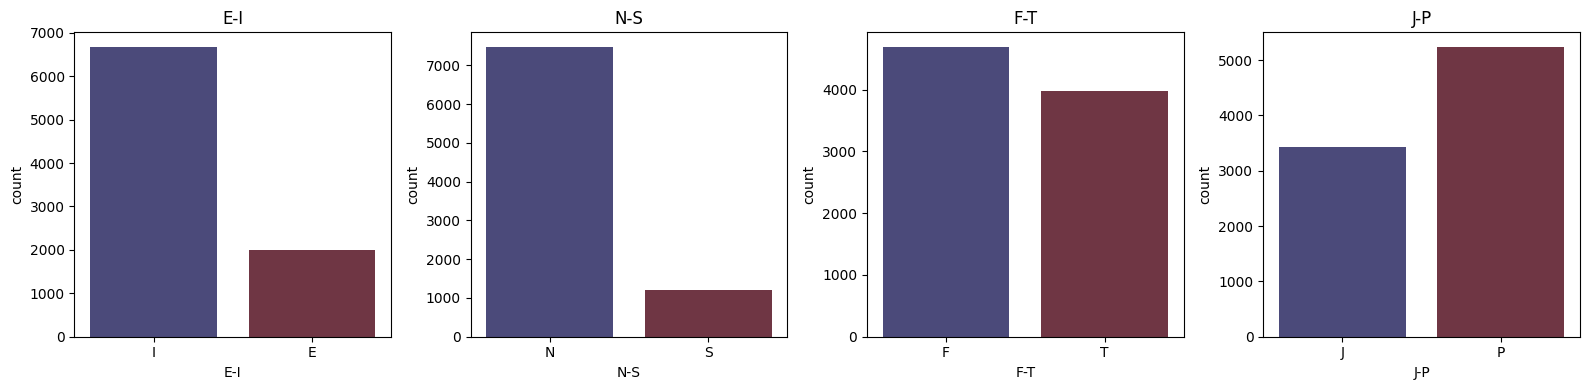

In [29]:
show_distribution1(data)

In [37]:
# def show_distributions(data, titles, figsize=(12, 3), xticks_size=10, palette="icefire"):
#     fig, axes = plt.subplots(1, 4, figsize=figsize)

#     for i, (class_data, title) in enumerate(zip(data, titles)):
#         sns.countplot(x=class_data, palette=palette, ax=axes[i])
#         axes[i].set_title(title)
#         axes[i].set_xticklabels(axes[i].get_xticklabels(), size=xticks_size)

#     plt.tight_layout()
#     plt.show()

In [40]:
def show_distributions(data, titles, figsize=(12, 4), xticks_size=10, palette="icefire"):
    fig, axes = plt.subplots(1, 4, figsize=figsize)

    for i, (class_data, title) in enumerate(zip(data, titles)):
        ax = sns.countplot(x=class_data, palette=palette, ax=axes[i])
        ax.set_title(title)
        ax.set_xticklabels(ax.get_xticklabels(), size=xticks_size)

        # Add annotations for total number of records in each bar
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                        textcoords='offset points')

    plt.tight_layout()
    plt.show()

C:\Users\devra\AppData\Local\Temp\ipykernel_18000\3481151473.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=class_data, palette=palette, ax=axes[i])
C:\Users\devra\AppData\Local\Temp\ipykernel_18000\3481151473.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), size=xticks_size)
C:\Users\devra\AppData\Local\Temp\ipykernel_18000\3481151473.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=class_data, palette=palette, ax=axes[i])
C:\Users\devra\AppData\Local\Temp\ipykernel_18000\3481151473.py:7: UserWarning: set_ticklabels() should only be used

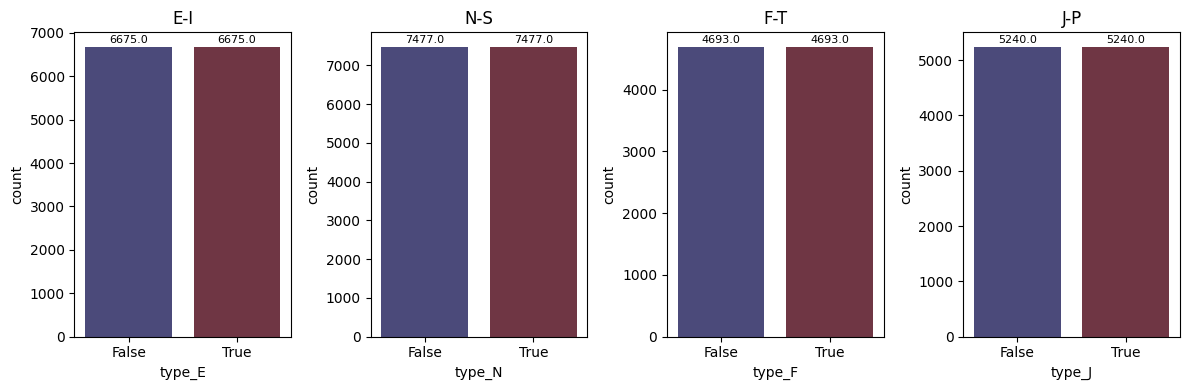

In [47]:
from imblearn.over_sampling import RandomOverSampler
sampling_strategy = 1  # Adjust the ratio of minority to majority class
random_state = 42  # Set a specific random seed for reproducibility

# Create an instance of RandomOverSampler with specified parameters
oversample = RandomOverSampler(
    sampling_strategy=sampling_strategy,
    random_state=random_state
)
# y_ei = y["type_E"]
# y_ns = y["type_N"]
# y_ft = y["type_F"]
# y_jp = y["type_J"]
# Oversample each class separately
X_over_ei, y_over_ei = oversample.fit_resample(X, y["type_E"])
X_over_ns, y_over_ns = oversample.fit_resample(X, y["type_N"])
X_over_ft, y_over_ft = oversample.fit_resample(X, y["type_F"])
X_over_jp, y_over_jp = oversample.fit_resample(X, y["type_J"])

show_distributions(
    data=[y_over_ei, y_over_ns, y_over_ft, y_over_jp],
    titles=["E-I", "N-S", "F-T", "J-P"]
)

In [49]:
X_over_ei.tail(5)

,cleaned_post
13345,actor deep passion drama undoubtedly good delv...
13346,let try answer point one one bold know real si...
13347,long change past action relate happiness surro...
13348,anyone taking nootropics take affect cognitive...
13349,know suppose love people lately came mind like...


In [18]:
from sklearn.model_selection import train_test_split
X_train_ei, X_test_ei, y_train_ei, y_test_ei = train_test_split(X_over_ei, y_over_ei, test_size=0.2, random_state=42)
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(X_over_ns, y_over_ns, test_size=0.2, random_state=42)
X_train_ft, X_test_ft, y_train_ft, y_test_ft = train_test_split(X_over_ft, y_over_ft, test_size=0.2, random_state=42)
X_train_jp, X_test_jp, y_train_jp, y_test_jp = train_test_split(X_over_jp, y_over_jp, test_size=0.2, random_state=42)
X_train_ei = X_train_ei['cleaned_post']
X_train_ns = X_train_ns['cleaned_post']
X_train_ft = X_train_ft['cleaned_post']
X_train_jp = X_train_jp['cleaned_post']
X_test_ei = X_test_ei['cleaned_post']
X_test_ns = X_test_ns['cleaned_post']
X_test_ft = X_test_ft['cleaned_post']
X_test_jp = X_test_jp['cleaned_post']
y_train_ei.name, y_test_ei.name = "E-I", "E-I"
y_train_ns.name, y_test_ns.name = "N-S", "N-S"
y_train_ft.name, y_test_ft.name = "F-T", "F-T"
y_train_jp.name, y_test_jp.name = "J-P", "J-P"
y_all_train = [y_train_ei, y_train_ns, y_train_ft,  y_train_jp]
y_all_test  = [y_test_ei, y_test_ns, y_test_ft, y_test_jp]

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define TF-IDF vectorizer with various parameters
vectorizer = TfidfVectorizer(
    max_features=10000,
    sublinear_tf=True,    # Apply sublinear TF scaling
    smooth_idf=True,       # Smooth IDF
    norm='l2',            # L2 normalization
    min_df=2,              # Minimum document frequency
    max_df=0.8,            # Maximum document frequency
    ngram_range=(1, 2),    # Include unigrams and bigrams
    stop_words='english'   # Exclude common English stop words
)

# Fit and transform the training data
X_train_ei = vectorizer.fit_transform(X_train_ei)
X_test_ei  = vectorizer.transform(X_test_ei)

X_train_ns = vectorizer.fit_transform(X_train_ns)
X_test_ns  = vectorizer.transform(X_test_ns)

X_train_ft = vectorizer.fit_transform(X_train_ft)
X_test_ft  = vectorizer.transform(X_test_ft)

X_train_jp = vectorizer.fit_transform(X_train_jp)
X_test_jp  = vectorizer.transform(X_test_jp)

# Optionally, you can create a list for all training and test sets
x_all_train = [X_train_ei, X_train_ns, X_train_ft, X_train_jp]
x_all_test  = [X_test_ei, X_test_ns, X_test_ft, X_test_jp]


In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
import pickle
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
def create_models():
    nb_clf  = MultinomialNB(alpha=0.01)
    svm_clf = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
    dt_clf  = DecisionTreeClassifier(max_depth=7)
    rf_clf  = RandomForestClassifier(n_estimators=750)
    xgb_clf = xgboost.XGBClassifier(eval_metric=None)
    lr_clf  = LogisticRegression(max_iter=1000, random_state=42)
    return {"NaiveBayes":nb_clf, "SVM":svm_clf, "DecisionTree":dt_clf, "RandomForest":rf_clf, "Xgboost":xgb_clf,"LogisticRegression": lr_clf}

_metrics = ["Accuracy", "Accuracy", "Accuracy" ,"Accuracy", "Precision", "Precision", "Precision","Precision", "Recall","Recall","Recall","Recall", "F1-Score", "F1-Score", "F1-Score", "F1-Score", "Roc-Auc Score", "Roc-Auc Score", "Roc-Auc Score", "Roc-Auc Score"]
_types   = ["E-I", "N-S", "F-T", "J-P", "E-I", "N-S", "F-T", "J-P", "E-I", "N-S", "F-T", "J-P","E-I", "N-S", "F-T", "J-P","E-I", "N-S", "F-T", "J-P"]
_columns = ["NaiveBayes", "SVM", "DecisionTree", "RandomForest", "Xgboost", "LogisticRegression"]
evaluation_df = pd.DataFrame(columns=_columns, index=[_metrics, _types])
models = create_models()

for model_item in models.items():
    for X_train, X_test, y_train, y_test in zip(x_all_train, x_all_test, y_all_train, y_all_test):
        # Model creation and prediction
        model = model_item[1]
        print(f"{model} is training for {y_train.name}...")
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        # Performance evaluation metrics
        evaluation_df.loc["Accuracy",y_train.name][model_item[0]]      = round(metrics.accuracy_score(y_test, pred), 3)
        evaluation_df.loc["Precision",y_train.name][model_item[0]]     = round(metrics.precision_score(y_test, pred), 3)
        evaluation_df.loc["Recall",y_train.name][model_item[0]]        = round(metrics.recall_score(y_test, pred), 3)
        evaluation_df.loc["F1-Score",y_train.name][model_item[0]]      = round(metrics.f1_score(y_test, pred), 3)
        evaluation_df.loc["Roc-Auc Score",y_train.name][model_item[0]] = round(metrics.roc_auc_score(y_test, pred), 3)
        # Save model
        # filename = f'{MODEL}{model_item[0]}_{y_test.name}.sav'
        # print(filename)
        # pickle.dump(model,open(filename, 'wb'))
        
evaluation_df.to_csv('evaluation_df_tfidf.csv', index=False)
evaluation_df

MultinomialNB(alpha=0.01) is training for E-I...
MultinomialNB(alpha=0.01) is training for N-S...
MultinomialNB(alpha=0.01) is training for F-T...
MultinomialNB(alpha=0.01) is training for J-P...
SVC(gamma='auto', kernel='linear') is training for E-I...


C:\Users\devra\AppData\Local\Temp\ipykernel_17628\3723647206.py:32: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  evaluation_df.loc["Accuracy",y_train.name][model_item[0]]      = round(metrics.accuracy_score(y_test, pred), 3)
C:\Users\devra\